In [2]:
import pandas as pd
import numpy as np

In [12]:
pop = pd.Series([33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561],index=['a','b','c','d','e','f'])
pop

a    33871648
b    37253956
c    18976457
d    19378102
e    20851820
f    25145561
dtype: int64

In [16]:
index=['a','b','c','d','e','f']
pop = pd.Series([33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561],index=index)
pop
pop['a': 'c']

a    33871648
b    37253956
c    18976457
dtype: int64

In [17]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [18]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [28]:
l = []
for i in pop.index:
    if i[1] == 2010:
        l.append(pop[i])
print(l)

[37253956, 19378102, 25145561]


In [29]:
l = [pop[i] for i in pop.index if i[1] == 2010]
l

[37253956, 19378102, 25145561]

In [33]:
pop[[('California', 2010),('New York', 2010),('Texas', 2010)]]
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [36]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]

index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [37]:
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [38]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [39]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [40]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [41]:
pop_sir = pop_df.stack()
pop_sir

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [42]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [43]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [51]:
f_u18  = pop_df['under18']/ pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [54]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'],[1,2,1,2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.898769  0.120486
  2  0.091982  0.845141
b 1  0.413202  0.988192
  2  0.276032  0.931984

In [56]:
pop.index.names = ['state','year' ]
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [63]:
# 계층적 인덱스와 열
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                    names=['subject', 'type'])

data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      30.0  37.2  50.0  36.9  25.0  37.3
     2      48.0  37.8  47.0  36.4  29.0  36.0
2014 1      22.0  35.7  16.0  36.7  46.0  36.5
     2      44.0  37.2  32.0  36.7  27.0  38.6

In [68]:
health_data['Guido']
health_data['Guido']['HR']
health_data['Guido','HR']

year  visit
2013  1        50.0
      2        47.0
2014  1        16.0
      2        32.0
Name: (Guido, HR), dtype: float64

In [74]:
pop
pop['California']
pop['California',2000]
pop
pop['California' : 'New York']
# 2000년도 데이터만 가지고 오시오
pop[: , 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [79]:
# 모든 데이터에서 22000000보다 큰 데이터만 출력하시오.
pop > 22000000 # 마스크
pop[pop > 22000000] # 마스킹
# California , Texas데이터를 가지고 오시오.
pop['California'], pop['Texas']
pop[['California','Texas' ]] # 팬시 인덱싱

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [84]:
health_data
health_data.iloc[0:2, 0:2]
health_data
health_data.loc[: , ('Guido', 'Temp')]

year  visit
2013  1        36.9
      2        36.4
2014  1        36.7
      2        36.7
Name: (Guido, Temp), dtype: float64

In [87]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1] , idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,30.0,50.0,25.0
2014,1,22.0,16.0,46.0


In [105]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.355351
      2      0.274061
c     1      0.474610
      2      0.116276
b     1      0.262809
      2      0.635166
dtype: float64

In [106]:
# index 정렬
data = data.sort_index()
data

char  int
a     1      0.355351
      2      0.274061
b     1      0.262809
      2      0.635166
c     1      0.474610
      2      0.116276
dtype: float64

In [108]:
data['a' : 'b']

char  int
a     1      0.355351
      2      0.274061
b     1      0.262809
      2      0.635166
dtype: float64

In [113]:
pop.unstack()
pop.unstack(level=0)
pop.unstack(level=1)
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [123]:
pop
pop_flat = pop.reset_index(name='population')
pop_flat
#print(type(pop_flat))
pop_ser = pop_flat.set_index(['state'	,'year'])
pop_ser
#print(type(pop_ser))

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [131]:
health_data
#### 각 열에 대한 년도의 평균을 구하시오.
data_mean = health_data.mean(level = 'year')
data_mean
data_mean.mean(level = 'type', axis=1)

C:\Users\SCOOL\AppData\Local\Temp\ipykernel_720\2173746977.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level = 'year')
C:\Users\SCOOL\AppData\Local\Temp\ipykernel_720\2173746977.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(level = 'type', axis=1)


type,HR,Temp
year,,
2013,38.166667,36.933333
2014,31.166667,36.900000


In [130]:
health_data
health_data.mean(level = 'type', axis=1)

C:\Users\SCOOL\AppData\Local\Temp\ipykernel_720\1123710997.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  health_data.mean(level = 'type', axis=1)


type               HR       Temp
year visit                      
2013 1      35.000000  37.133333
     2      41.333333  36.733333
2014 1      28.000000  36.300000
     2      34.333333  37.500000

In [134]:
# numpy 배열 연결
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [136]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x])
np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [141]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[1, 2, 3])
ser3 = pd.concat([ser1, ser2])
ser3[1]
ser4 = pd.concat([ser1, ser2], ignore_index = True)
ser4

0    A
1    B
2    C
3    D
4    E
5    F
dtype: object

In [191]:
df1 = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk2110/main/data/concat_1.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk2110/main/data/concat_2.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk2110/main/data/concat_3.csv")
df1, df2, df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [145]:
# x축 기준 : 행으로 연결
row_concat = pd.concat([df1, df2, df3], axis = 0)
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [144]:
col_concat =   pd.concat([df1, df2, df3] , axis = 1)
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [150]:
row_concat
row_concat.loc[0]
row_concat.iloc[0]
row_concat.loc[1]

,A,B,C,D
1,a1,b1,c1,d1
1,a5,b5,c5,d5
1,a9,b9,c9,d9


In [158]:
row_concat
row_concat.loc[1, 'A']
row_concat.iloc[5, 0]
# 암시적인덱스 5행을 가지고 오시오
row_concat.iloc[5,]
row_concat.iloc[5]
row_concat.iloc[5 , : ]

A    a5
B    b5
C    c5
D    d5
Name: 1, dtype: object

In [167]:
new_row_series = pd.Series(['n1', 'n2', 'n3', 'n4'])
new_row_series
# 데이터프레임과 시리즈를 연결
dataframe_series  = pd.concat([new_row_series, df1])
dataframe_series
dataframe_series  = pd.concat([new_row_series, df1], axis = 1)
dataframe_series

,0,A,B,C,D
0,n1,a0,b0,c0,d0
1,n2,a1,b1,c1,d1
2,n3,a2,b2,c2,d2
3,n4,a3,b3,c3,d3


In [165]:
df4 = pd.DataFrame([['n1','n2','n3','n4']], columns=['A', 'B' ,  'C' ,  'D'])
df4
pd.concat([df4, df1])

,A,B,C,D
0,n1,n2,n3,n4
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [175]:
df5 = pd.concat([df1,df2,df3])
df5
df5.loc[0]
df5.iloc[0]
df5 = pd.concat([df1,df2,df3], ignore_index=True)
df5
df5.loc[0]

A    a0
B    b0
C    c0
D    d0
Name: 0, dtype: object

In [181]:
col_concat  = pd.concat([df1,df2,df3], axis = 1 , ignore_index=True)
col_concat
col_concat[0]

0    a0
1    a1
2    a2
3    a3
Name: 0, dtype: object

In [188]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
df2.columns = ['E','F','G','H']
df2
df3.columns = ['A','C','F','H']
df3
df1, df2, df3
df6 = pd.concat([df1, df3] , join='inner' , ignore_index=True)
df6

Index(['A', 'B', 'C', 'D'], dtype='object')
Index(['E', 'F', 'G', 'H'], dtype='object')
Index(['A', 'C', 'F', 'H'], dtype='object')


,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
4,a8,b8
5,a9,b9
6,a10,b10
7,a11,b11


In [193]:
print(df2.index)
print(df3.index)
df2.index = [4, 5, 6, 7]  # 행번호를 변경
df3.index = [0, 2, 5, 7]
print(df2.index)
print(df3.index)

RangeIndex(start=0, stop=4, step=1)
RangeIndex(start=0, stop=4, step=1)
Int64Index([4, 5, 6, 7], dtype='int64')
Int64Index([0, 2, 5, 7], dtype='int64')


In [194]:
df2, df3

(    A   B   C   D
 4  a4  b4  c4  d4
 5  a5  b5  c5  d5
 6  a6  b6  c6  d6
 7  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 2   a9   b9   c9   d9
 5  a10  b10  c10  d10
 7  a11  b11  c11  d11)

In [198]:
print(df1)
print(df3)
### 행번호가 일치하는 것끼리만 연결 : y축기준
col_concat2 = pd.concat([df1,df3], axis = 1, join ='inner') 
print(col_concat2)

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
     A    B    C    D
0   a8   b8   c8   d8
2   a9   b9   c9   d9
5  a10  b10  c10  d10
7  a11  b11  c11  d11
    A   B   C   D   A   B   C   D
0  a0  b0  c0  d0  a8  b8  c8  d8
2  a2  b2  c2  d2  a9  b9  c9  d9


In [207]:
df1, df3
row_df1 = df1.append(df4) # x축 기준으로 연결
print(row_df1)

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
0  n1  n2  n3  n4


C:\Users\SCOOL\AppData\Local\Temp\ipykernel_720\472189282.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row_df1 = df1.append(df4) # x축 기준으로 연결


In [221]:
df1, df3
#df7 = pd.concat([df1, df3], join_axes=[df1.columns])
#df7

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
      A    C    F    H
 0   a8   b8   c8   d8
 2   a9   b9   c9   d9
 5  a10  b10  c10  d10
 7  a11  b11  c11  d11)

In [231]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df1, df2
df3 = pd.concat([df1, df2], axis=1)
df3
df3 = pd.merge(df1, df2)
df3

(  employee        group
 0      Bob   Accounting
 1     Jake  Engineering
 2     Lisa  Engineering
 3      Sue           HR,
   employee  hire_date
 0     Lisa       2004
 1      Bob       2008
 2     Jake       2012
 3      Sue       2014)

In [232]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df3, df4
df5 = pd.merge(df3, df4)
df5

(  employee        group  hire_date
 0      Bob   Accounting       2008
 1     Jake  Engineering       2012
 2     Lisa  Engineering       2004
 3      Sue           HR       2014,
          group supervisor
 0   Accounting      Carly
 1  Engineering      Guido
 2           HR      Steve)

In [234]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
df1, df5
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [241]:
df1, df2
pd.merge(df1, df2, on='employee')

(  employee        group
 0      Bob   Accounting
 1     Jake  Engineering
 2     Lisa  Engineering
 3      Sue           HR,
   employee  hire_date
 0     Lisa       2004
 1      Bob       2008
 2     Jake       2012
 3      Sue       2014)

In [246]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df3,  left_on="employee", right_on="name")
df1.merge(df3,  left_on="employee", right_on="name")
df1.merge(df3,  left_on="employee", right_on="name").drop("name", axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [252]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
df1a, df2a
pd.merge(df1a, df2a, left_index=True, right_index=True)
df1a.merge( df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [256]:
df1a, df3
pd.merge(df1a, df3, left_index = True, right_on = 'name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [262]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
df8, df9
pd.merge(df8, df9, on="name")
pd.merge(df8, df9, on="name", suffixes = ["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [268]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
df6, df7
pd.merge(df6, df7)

pd.merge(df6, df7, how ='inner')
df6, df7
pd.merge(df6, df7, how ='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [273]:
df6, df7
pd.merge(df6, df7, how ='left')
df6.merge(df7, how ='left')
df6.merge(df7, how ='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [274]:
pop = pd.read_csv('https://raw.githubusercontent.com/wikibook/python-ds-handbook/master/notebooks/data/state-population.csv')
areas = pd.read_csv('https://raw.githubusercontent.com/wikibook/python-ds-handbook/master/notebooks/data/state-areas.csv')
abbrevs = pd.read_csv('https://raw.githubusercontent.com/wikibook/python-ds-handbook/master/notebooks/data/state-abbrevs.csv')

In [279]:
pop.head(), areas.head(), abbrevs.head()

(  state/region     ages  year  population
 0           AL  under18  2012   1117489.0
 1           AL    total  2012   4817528.0
 2           AL  under18  2010   1130966.0
 3           AL    total  2010   4785570.0
 4           AL  under18  2011   1125763.0,
         state  area (sq. mi)
 0     Alabama          52423
 1      Alaska         656425
 2     Arizona         114006
 3    Arkansas          53182
 4  California         163707,
         state abbreviation
 0     Alabama           AL
 1      Alaska           AK
 2     Arizona           AZ
 3    Arkansas           AR
 4  California           CA)

In [285]:
merged = pd.merge(pop, abbrevs , how ='inner' , 
                 left_on = 'state/region', right_on = 'abbreviation')
merged = merged.drop('abbreviation', axis = 1)
merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming
2444,WY,total,1991,459260.0,Wyoming
2445,WY,under18,1991,136720.0,Wyoming
2446,WY,under18,1990,136078.0,Wyoming


In [292]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets
planets.shape
planets.info()
planets.head()
# null의 갯수 확인
planets.shape[0] - planets.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [295]:
planets.describe()
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [298]:
# GroupBy: Split, Apply, Combine
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df 
df.groupby("key").sum()
df.groupby("key").describe()

data                                         
    count mean      std  min   25%  50%   75%  max
key                                               
A     2.0  1.5  2.12132  0.0  0.75  1.5  2.25  3.0
B     2.0  2.5  2.12132  1.0  1.75  2.5  3.25  4.0
C     2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0

In [303]:
planets.groupby('method').median()['orbital_period']
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [311]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [312]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [313]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/SoongMoo/soldesk2110/main/data/gapminder.tsv", 
    sep="\t")
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [320]:
df.groupby('year').mean()
df.groupby('year')['lifeExp'].mean()
df.groupby('year').lifeExp.mean()
df['year']
df.year
df.groupby('year').mean()['lifeExp']
df.groupby('year').mean().lifeExp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [324]:
df
df.groupby(['year', 'continent']).mean()
df.groupby(['year', 'continent'])['lifeExp'].mean()
df.groupby(['year', 'continent']).lifeExp.mean()
df.groupby(['year', 'continent']).lifeExp.mean().head()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
Name: lifeExp, dtype: float64

In [326]:
### 년도별 지역의 gdp에 따른 평균수명에 대한 평균은?
df
df.groupby(['year', 'continent', 'gdpPercap']).lifeExp.mean()
### 년도별 지역의 평균 수명의 평균과 gdp의 평균을 구하시오
df.groupby(['year', 'continent'])['lifeExp','gdpPercap'].mean()

C:\Users\SCOOL\AppData\Local\Temp\ipykernel_720\1383371160.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['year', 'continent'])['lifeExp','gdpPercap'].mean()


lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [327]:
## 지역에 대한 나라의 갯수
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

<AxesSubplot:xlabel='year'>

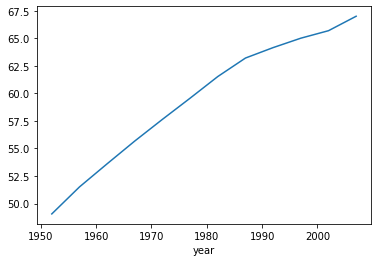

In [329]:
# 년도별 평균 수명의 평균을 구하시오
df.groupby('year')['lifeExp'].mean()
import matplotlib as plt
df.groupby('year')['lifeExp'].mean().plot()

In [335]:
#Aggregate, filter, transform, apply
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df
df.groupby('key').min()
df.groupby('key').max()
df.groupby('key').mean()
df.groupby('key').aggregate(['min', max, np.median])

data1             data2            
      min amax median   min amax median
key                                    
A       0    3    1.5     3    5    4.0
B       1    4    2.5     0    7    3.5
C       2    5    3.5     3    9    6.0

In [336]:
df.groupby('key').aggregate({"data1":min, "data2": max})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [340]:
# Filtering
def filter_func(x):
    return  x['data2'].std() > 4 # df.groupby('key')['data2'].std()
df, df.groupby('key').std()
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [341]:
### lambda함수
def add(a, b):
    return a + b
result = add(3, 4)
print(result)

7


In [342]:
add = lambda a, b : a + b
result = add(3, 4)
print(result)

7


In [343]:
def add(a, b = 10):
    return a + b
result = add(3)
print(result)

13


In [ ]:
add = lambda a, b = 10 : a + b
result = add(3)
print(result)

In [345]:
a = (1,2,3,4) 
result = []
for i in a:
    if i % 2 == 0:
        result.append(i * 3)
print(result)

result = [i * 3 for i in a if i % 2 == 0 ] 

[6, 12]


In [ ]:
def add(opt, a, b):
    if opt == "add":
        return a + b
    else:
        return a - b

In [346]:
add = lambda opt, a, b : a + b if opt == "add" else a - b
result = add("add", 4 , 3)
print(result)

7


In [ ]:
def add(opt, a, b):
    if opt == "add":
        return a + b
    else:
        if opt == "sub":
            return a - b
        else:
            if opt == "mul":
                return a * b
            else:
                return a / b

In [347]:
add = lambda opt, a, b :  a + b if opt == "add" else (
                          a - b if opt == "sub" else (
                          a * b if opt == "mul" else a / b
                          ))
result = add("add", 4 , 3)
print(result)

7


In [354]:
def f (x):
    return x - x.mean()

In [ ]:
f = lambda  x : x - x.mean()
f(df.groupby('key'))

In [355]:
df.groupby('key').transform(lambda  x : x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [356]:
df.groupby('key').apply(f)

C:\Users\SCOOL\AppData\Local\Temp\ipykernel_720\3304050746.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return x - x.mean()


,data1,data2,key
0,-1.5,1.0,NaN
1,-1.5,-3.5,NaN
2,-1.5,-3.0,NaN
3,1.5,-1.0,NaN
4,1.5,3.5,NaN
5,1.5,3.0,NaN


In [358]:
# 피벗 테이블
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [360]:
# 성별에 따른 생존률
titanic.groupby('sex').survived.mean()
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [364]:
# 성별별 좌석등급에  따른 생존률 평균
titanic.groupby(['sex','class' ]).survived.mean()
titanic.groupby(['sex','class' ])[['survived']].mean()
titanic.groupby(['sex','class' ]).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [365]:
titanic.pivot_table('survived',index='sex', columns ='class' )

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [366]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [369]:
fare  = pd.cut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare , 'class'])

fare            (-0.512, 256.165]                     (256.165, 512.329]
class                       First    Second     Third              First
sex    age                                                              
female (0, 18]           0.900000  1.000000  0.511628                1.0
       (18, 80]          0.971429  0.900000  0.423729                1.0
male   (0, 18]           0.800000  0.600000  0.215686                NaN
       (18, 80]          0.369565  0.071429  0.133663                0.5

In [373]:
titanic.pivot_table(index='sex', columns ='class' ,
                   aggfunc={'survived':sum , 'fare' : 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [374]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [382]:
births = pd.read_csv("https://raw.githubusercontent.com/wikibook/python-ds-handbook/master/notebooks/data/births.csv")
births.head()
births['decade'] = (births['year'] // 10 ) *10
births
births.pivot_table('births', index='decade', columns = 'gender' , aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


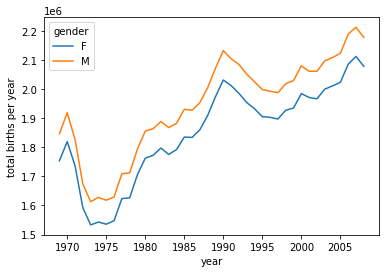

In [386]:
import matplotlib.pyplot as plt
births.pivot_table('births', index='year', columns = 'gender' , aggfunc = 'sum')
births.pivot_table('births', index='year', columns = 'gender' , aggfunc = 'sum').plot()
plt.ylabel('total births per year');

In [389]:
quartiles = np.percentile(births['births'], [25, 50,75])
mu = quartiles[1]
mu
sig = 0.74 * (quartiles[2] - quartiles[0])

In [391]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [393]:
# 년(year), 월(month), 일(day)로부터 날짜(datetime) 인덱스를 생성 
# 19991212
births.index = pd.to_datetime(births.year * 10000 + 
                              births.month * 100 +
                             births.day,format='%Y%m%d' )
births['dayofweek'] = births.index.dayofweek
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1.0,F,4046,1960,2
1969-01-01,1969,1,1.0,M,4440,1960,2
1969-01-02,1969,1,2.0,F,4454,1960,3
1969-01-02,1969,1,2.0,M,4548,1960,3
1969-01-03,1969,1,3.0,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29.0,M,5944,1980,3
1988-12-30,1988,12,30.0,F,5742,1980,4
1988-12-30,1988,12,30.0,M,6095,1980,4
1988-12-31,1988,12,31.0,F,4435,1980,5


C:\Users\SCOOL\AppData\Local\Temp\ipykernel_720\598896414.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['','Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


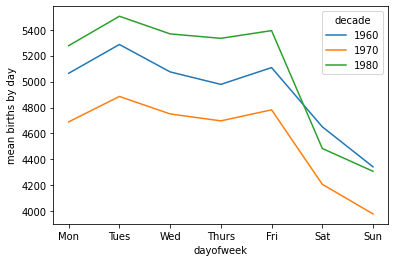

In [398]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['','Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');